In [1]:
import sys
!{sys.executable} -m pip install pyeasyga

  Preparing metadata (setup.py) ... done
  Created wheel for pyeasyga: filename=pyeasyga-0.3.1-py2.py3-none-any.whl size=6784 sha256=b4596c241dd28590d200809e13160035b14530ac583f3022b5b9f2ffda6b5d51
  Stored in directory: /root/.cache/pip/wheels/62/dc/8e/1f2f52b623874fe87032642a8fc1f64a2175fd26d77c95b469
Successfully built pyeasyga


In [3]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np

# LV9 Uvodni primjer Drop Wave

In [4]:
# dropwave function, xmin = [0,0] (coordinates of global minimum), fmin = -1 (value of global minimum)
def criteria_function(x):
  x1 = x[0]
  x2 = x[1]
  return (-1 - np.cos(12*np.sqrt(x1**2 + x2**2))) / (0.5*(x1**2 + x2**2) + 2)

# x is in range [-5, 5], y is in range [-5, 5] dopustiva oblast
RANGE = np.array([[-5,5], [-5,5]])

ga = GeneticAlgorithm(seed_data = criteria_function,
                      population_size = 30,
                      generations = 200,
                      crossover_probability = 0.8,
                      mutation_probability = 0.02,
                      elitism = True,
                      maximise_fitness = False)  # koristi se turnirska selekcija

In [5]:
# first half => x, second half => y
BINARY_CHROMOSOME_LENGTH = 26

# randomly generate candidate solution, used in generating initial population
def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

In [7]:
# two-point crossover
def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

# randomly select a bit and invert it
def mutate(individual):
    mutate_index = random.randrange(len(individual))
    if individual[mutate_index] == 0:
      individual[mutate_index] = 1
    else:
      individual[mutate_index] = 0

ga.mutate_function = mutate

In [8]:
# define selection function here if necessary
# def selection(population):
# and assign it to the selection_function method
# ga.selection_function = selection

# using tournament selection by default

# set tournament size to 2
ga.tournament_size = 2

In [9]:
def decimal(binary):
    sum = 0
    for i in range(0, len(binary)):
      sum += binary[len(binary)-1-i]*2**(i)
    return sum

# decoding binary representation of individuals
def decode(individual):
    x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
    y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
    x_range = RANGE[0]
    y_range = RANGE[1]
    x_min = x_range[0]
    x_max = x_range[1]
    y_min = y_range[0]
    y_max = y_range[1]
    x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
    y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
    return x_decode, y_decode

def is_in_range(x, range_x):
    return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
    x_decode, y_decode = decode(individual)
    while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
        individual = create_individual(data)
        x_decode, y_decode = decode(individual)
    fitness = data([x_decode, y_decode])
    return fitness

ga.fitness_function = fitness

In [10]:
ga.run()

print("Best individual fitness and best individual binary chromosome:")
print(ga.best_individual())
print("Best individual decoded:")
print(decode(ga.best_individual()[1]))
print("Best individual function value:")
print(criteria_function(decode(ga.best_individual()[1])))
print("\n---------------------------\n")
print("Last generation:")

for individual in ga.last_generation():
  print(individual)

Best individual fitness and best individual binary chromosome:
(np.float64(-0.7797762269222028), [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
Best individual decoded:
(np.float64(-1.0151385667195703), np.float64(-0.15565864973751697))
Best individual function value:
-0.7797762269222028

---------------------------

Last generation:
(np.float64(-0.7797762269222028), [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
(np.float64(-0.7797762269222028), [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
(np.float64(-0.7797762269222028), [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
(np.float64(-0.7797762269222028), [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
(np.float64(-0.7797762269222028), [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
(np.float64(-0.7797762269222028), [0, 1, 1, 0, 0, 1, 1, 0, 0,

# Zadatak 1 - Rastringova funkcija

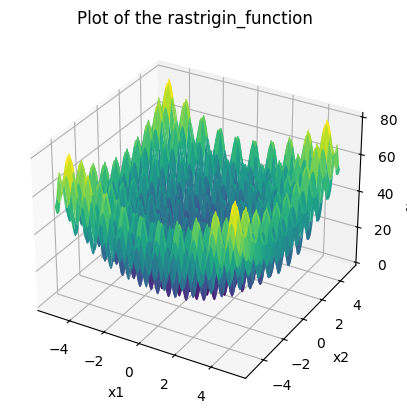

In [20]:
# a)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

def rastrigin_function(x):
    x1 = x[0]
    x2 = x[1]
    return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

x1_range = np.linspace(-5.12, 5.12, 400)
x2_range = np.linspace(-5, 5, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = np.zeros_like(X1)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = rastrigin_function([X1[i, j], X2[i, j]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
plt.title('Plot of the rastrigin_function')
plt.show()

Funkcija je multimodalna, tj. ima vise od jednog globalnog minimuma, kao mnoge lokalne minimume i duboka udubljenja

In [23]:
# b) broj hromozoma 26

def rastrigin_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = rastrigin_function,
population_size = 30,
generations = 200,
crossover_probability = 0.8,
mutation_probability = 0.02,
elitism = True,
maximise_fitness = False)

BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0

ga.mutate_function = mutate

ga.tournament_size = 2

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
        sum += binary[len(binary)-1-i]*2**(i)
  return sum

def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness

ga.run()

print("Best individual fitness and best individual binary chromosome:")
print(ga.best_individual())

print("Best individual decoded:")
print(decode(ga.best_individual()[1]))

print("Best individual function value:")
print(rastrigin_function(decode(ga.best_individual()[1])))

print("\n---------------------------\n")

print("Last generation:")
for individual in ga.last_generation():
  print(individual)


Best individual fitness and best individual binary chromosome:
(np.float64(4.003700814389973), [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Best individual decoded:
(np.float64(2.0008692467342204), np.float64(-0.0006104260774018044))
Best individual function value:
4.003700814389973

---------------------------

Last generation:
(np.float64(4.003700814389973), [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(np.float64(4.003700814389973), [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(np.float64(4.003700814389973), [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(np.float64(4.003700814389973), [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(np.float64(4.003700814389973), [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(np.float64(4.003700814389973), [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [25]:
# b) broj hromozoma 6

def rastrigin_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = rastrigin_function,
population_size = 30,
generations = 200,
crossover_probability = 0.8,
mutation_probability = 0.02,
elitism = True,
maximise_fitness = False)

BINARY_CHROMOSOME_LENGTH = 6

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0

ga.mutate_function = mutate

ga.tournament_size = 2

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness

ga.run()

print("Best individual fitness and best individual binary chromosome:")
print(ga.best_individual())
print("Best individual decoded:")
print(decode(ga.best_individual()[1]))

print("Best individual function value:")
print(rastrigin_function(decode(ga.best_individual()[1])))

print("\n---------------------------\n")

print("Last generation:")
for individual in ga.last_generation():
  print(individual)

Best individual fitness and best individual binary chromosome:
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
Best individual decoded:
(np.float64(-2.1942857142857144), np.float64(2.1428571428571432))
Best individual function value:
19.742256935483606

---------------------------

Last generation:
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.float64(19.742256935483606), [0, 1, 0, 1, 0, 1])
(np.fl

In [26]:
# c)

def rastrigin_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10*(np.cos(2*math.pi*x1) + np.cos(2*math.pi*x2))

RANGE = np.array([[-5.12,5.12], [-5,5]])

ga = GeneticAlgorithm(seed_data = rastrigin_function,
population_size = 30,
generations = 200,
crossover_probability = 0.8,
mutation_probability = 0.02,
elitism = True,
maximise_fitness = False)

BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

def mutate(individual):
  mutate_index = random.randrange(len(individual))
  if individual[mutate_index] == 0:
    individual[mutate_index] = 1
  else:
    individual[mutate_index] = 0
    ga.mutate_function = mutate

ga.tournament_size = 2

def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

def decode(individual):
  x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
  y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
  x_range = RANGE[0]
  y_range = RANGE[1]
  x_min = x_range[0]
  x_max = x_range[1]
  y_min = y_range[0]
  y_max = y_range[1]
  x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
  y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
  return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness
for mutation_probability in np.arange(0.01, 1.00, 0.03):
  ga.mutation_probability = mutation_probability
  ga.run()
  print(f"\nMUTATION PROBABILITY: {mutation_probability}")
  print("Best individual fitness and best individual binary chromosome:")
  print(ga.best_individual())
  print("Best individual decoded:")
  print(decode(ga.best_individual()[1]))

  print("Best individual function value:")
  print(rastrigin_function(decode(ga.best_individual()[1])))

  print("\n---------------------------\n")

  print("Last generation:")
  for individual in ga.last_generation():
    print(individual)



MUTATION PROBABILITY: 0.01
Best individual fitness and best individual binary chromosome:
(np.float64(0.00015144050272652976), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Best individual decoded:
(np.float64(0.0006250763032600304), np.float64(-0.0006104260774018044))
Best individual function value:
0.00015144050272652976

---------------------------

Last generation:
(np.float64(0.00015144050272652976), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(np.float64(0.00015144050272652976), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(np.float64(0.00015144050272652976), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(np.float64(0.00015144050272652976), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(np.float64(0.00015144050272652976), [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
(np.floa

Nema nekog posebnog pravila

In [ ]:
# e)

